# iGraph - Task 1

In [1]:
from igraph import Graph

import numpy as np
import matplotlib.pyplot as plt

Let's first define the values of p in logarithmic scale as 10^i from [-4, 0] and analyze how the parameter p modifies the shortest path and the clustering coefficient. To scale the results, we divide the data by the left-most point (when p = 0).

In [2]:
p_list = [10 ** -i for i in np.linspace(start=4, stop=0, num=14)]
results_sp = np.zeros(len(p_list), dtype=float)
results_cc = np.zeros(len(p_list), dtype=float)

for i, p in enumerate(p_list):
    watts = Graph.Watts_Strogatz(dim=1, size=2000, nei=4, p=p)
    results_sp[i] = watts.average_path_length()
    results_cc[i] = watts.transitivity_undirected()

# Scale values in [0, 1]
results_sp = (results_sp / results_sp[0]).tolist()
results_cc = (results_cc / results_cc[0]).tolist()

Now we only need to plot the results using the Matplotlib showing the values of p in log scale against its corresponding scaled clustering coefficient and average shortest path.

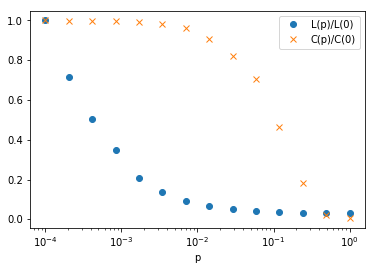

In [3]:
plt.xlabel('p')
plt.semilogx(p_list, results_sp, 'o', label='L(p)/L(0)')
plt.semilogx(p_list, results_cc, 'x', label='C(p)/C(0)')
plt.legend()

plt.savefig('images/task1.png', dpi=200)